This notebook contains code/analysis/figures for the blog post titled "Milton Friedman’s thermostat and sensitivity analysis of control policies" by Andrew Hamilton, on February 17, 2022, on the Water Programming Blog. https://waterprogramming.wordpress.com/2022/02/17/milton-friedmans-thermostat-and-sensitivity-analysis-of-control-policies/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams['font.size'] = '16'

DISCRETE
[[0 0 1 1 0 1 2 2 2]
 [0 0 1 1 0 1 2 2 2]
 [3 4 5 5 3 2 6 6 1]
 [7 7 7 7 7 7 7 7 7]]

Entropy(Y): 1.584962500721156
Entropy(X_1): 1.584962500721156
Entropy(X_2): 2.503258334775646
Entropy(X_3): 0.0

MI(Y, X_1): 1.584962500721156
MI(Y, X_2): 1.0566416671474375
MI(Y, X_3): 0.0

eta_Y(X_1): 1.0
eta_Y(X_2): 0.6666666666666667
eta_Y(X_3): 0.0

CONTINUOUS
Entropy(Y): 3.4510215434947757
Entropy(X_1): 3.423556918403089
Entropy(X_2): 3.3609058592775463

Entropy(Y): 5.283987493403339
Entropy(X_1): 5.289792560443907
Entropy(X_2): 5.302292661890817

MI(Y, X_1): 1.134173600900033
MI(Y, X_2): 0.020669980837881078

eta_Y(X_1): 0.3286486585509633
eta_Y(X_2): 0.005989525297761263

corrcoeff_binned(Y,X1): [[1.         0.88880473]
 [0.88880473 1.        ]]
corrcoeff_binned(Y,X2): [[1.         0.00493679]
 [0.00493679 1.        ]]


Text(0, 0.5, 'Y')

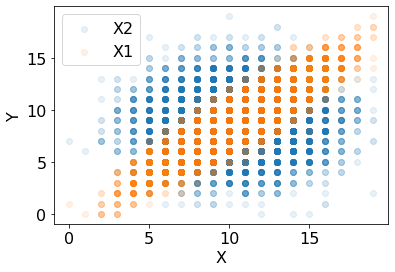

In [2]:
def get_binned(y, bins=-1, binsize=-1):
    ### Get binned discrete version of continuous data. 
    ###    bins=-1 indicates it is already discrete.
    if bins > 0:
        return pd.cut(y, bins, labels=False)
    if binsize > 0:
        return np.array([int(yi / binsize) for yi in y])

    else:
        return y

def single_entropy(y, bins=-1, binsize=-1, log_base=2):
    ### Calculate the entropy of a discrete random variable y. 
    ### Adapted from script by Roberto Maestre & Bojan Mihaljevic,
    ### (https://github.com/rmaestre/Mutual-Information/blob/master/it_tool.py)
    y = get_binned(y, bins, binsize)
    ny = len(y)
    summation = 0.0
    values_y = set(y)
    for value_y in values_y:
        py = np.shape(np.where(y==value_y))[1] / ny
        if py > 0.0:
            summation -= py * math.log(py, log_base)
    return summation
        
def mutual_information(y, x, bins=-1, binsize=-1, log_base=2):
    ### Calculate and return mutual information,
    ### between two discrete random variables y & x
    ### Adapted from script by Roberto Maestre & Bojan Mihaljevic,
    ### (https://github.com/rmaestre/Mutual-Information/blob/master/it_tool.py)
    y = get_binned(y, bins, binsize)
    x = get_binned(x, bins, binsize)
    ny = len(y)
    assert ny == len(x)
    summation = 0.0
    values_x = set(x)
    values_y = set(x)
    for value_y in values_y:
        for value_x in values_x:
            px = np.shape(np.where(x==value_x))[1] / ny
            py = np.shape(np.where(y==value_y))[1] / ny
            pxy = len(np.where(np.isin(np.where(x==value_x)[0], \
                                       np.where(y==value_y)[0])==True)[0]) / ny
            if pxy > 0.0:
                summation += pxy * math.log((pxy / (px*py)), log_base)
    return summation

def ITSA_index(y, x, bins=-1, binsize=-1, log_base=2):
    ### Calculate information theoretic sensitivity index, 
    ###    giving sensitivity of y to x (discrete)
    mi_y_x = mutual_information(y, x, bins, binsize, log_base) 
    entropy_y = single_entropy(y, bins, binsize, log_base)
    return mi_y_x / entropy_y
    

    
    
### example: discrete
print('DISCRETE')

# Example data array
data = np.array([(0, 0, 1, 1, 0, 1, 2, 2, 2),    #Y
                 (0, 0, 1, 1, 0, 1, 2, 2, 2),    #X1
                 (3, 4, 5, 5, 3, 2, 6, 6, 1),    #X2
                 (7, 7, 7, 7, 7, 7, 7, 7, 7)])   #X3
print(data)
print()

# --- Checking single random var entropy
print(f'Entropy(Y): {single_entropy(data[0,:])}')
print(f'Entropy(X_1): {single_entropy(data[1,:])}')
print(f'Entropy(X_2): {single_entropy(data[2,:])}')
print(f'Entropy(X_3): {single_entropy(data[3,:])}')
print()

# ---Checking Mutual Information between two random variables
print(f'MI(Y, X_1): {mutual_information(data[0,:], data[1,:])}')
print(f'MI(Y, X_2): {mutual_information(data[0,:], data[2,:])}')
print(f'MI(Y, X_3): {mutual_information(data[0,:], data[3,:])}')
print()

# ---Checking sensitivity of one variable to another
print(f'eta_Y(X_1): {ITSA_index(data[0,:], data[1,:])}')
print(f'eta_Y(X_2): {ITSA_index(data[0,:], data[2,:])}')
print(f'eta_Y(X_3): {ITSA_index(data[0,:], data[3,:])}')



### example: continuous
print()
print('CONTINUOUS')

# Define data array
data = np.random.multivariate_normal([0, 0, 0],
                                     [[1, 0.9, 0],
                                      [0.9, 1, 0],
                                      [0, 0, 1]],
                                     size=[10000]).transpose()
# print(data)
# print()

bins = 20
# --- Checking single random var entropy
print(f'Entropy(Y): {single_entropy(data[0,:], bins=bins)}')
print(f'Entropy(X_1): {single_entropy(data[1,:], bins=bins)}')
print(f'Entropy(X_2): {single_entropy(data[2,:], bins=bins)}')
print()
binsize = 0.1
# --- Checking single random var entropy
print(f'Entropy(Y): {single_entropy(data[0,:], binsize=binsize)}')
print(f'Entropy(X_1): {single_entropy(data[1,:], binsize=binsize)}')
print(f'Entropy(X_2): {single_entropy(data[2,:], binsize=binsize)}')
print()

# ---Checking Mutual Information between two random variables
print(f'MI(Y, X_1): {mutual_information(data[0,:], data[1,:], bins=bins)}')
print(f'MI(Y, X_2): {mutual_information(data[0,:], data[2,:], bins=bins)}')
print()

# ---Checking sensitivity of one variable to another
print(f'eta_Y(X_1): {ITSA_index(data[0,:], data[1,:], bins=bins)}')
print(f'eta_Y(X_2): {ITSA_index(data[0,:], data[2,:], bins=bins)}')
print()

# print correlation after binning
print(f'corrcoeff_binned(Y,X1): {np.corrcoef(get_binned(data[0,:], bins), get_binned(data[1,:], bins))}')
print(f'corrcoeff_binned(Y,X2): {np.corrcoef(get_binned(data[0,:], bins), get_binned(data[2,:], bins))}')

plt.scatter(get_binned(data[0,:], bins), get_binned(data[2,:], bins), alpha=0.1)
plt.scatter(get_binned(data[0,:], bins), get_binned(data[1,:], bins), alpha=0.1)
plt.legend(('X2','X1'))
plt.xlabel('X')
plt.ylabel('Y')

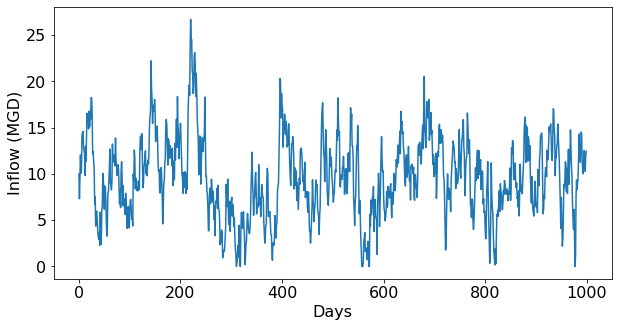

In [3]:
### get random inflow
T = 1000
I = np.random.normal(10, 20, size=T)
I[0] = 10
persistance = 0.9
for t in range(1, T):
    I[t] = (1 - persistance) * I[t] + persistance * I[t-1] 
I[I < 0] = 0
fig = plt.figure(figsize=(10, 5))
plt.plot(I)
plt.ylabel('Inflow (MGD)')
plt.xlabel('Days')
plt.savefig('inflow.png', bbox_inches='tight')

0.9733524390474243

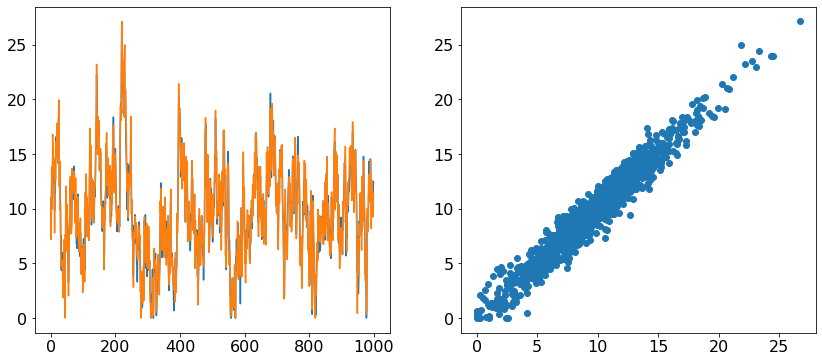

In [4]:
### forecasted inflow with error
# forecast_err = 0.001
forecast_err = 1

IFC = I + np.random.normal(0, forecast_err, size=T)
IFC[IFC<0] = 0

## forecast with todays value (only useful with persistance)
# IFC = np.roll(I, 1)
# IFC[0] = IFC[1] 

## forecast with mean flow -> no skill
# IFC = np.full(T, I.mean())


IFC[IFC < 0] = 0

fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(I)
axs[0].plot(IFC)
axs[1].scatter(I, IFC)

np.corrcoef(I, IFC)[0,1]

In [5]:
### reservoir release rule: storage stabilization policy
def get_R_update_S_stable(S_t, IFC_t, I_t):
    S_target = 10
    S_min = 0
    S_max = 20
    R_t = S_t - S_target + IFC_t
    S_tp1 = S_t + I_t - R_t
    if S_tp1 > S_max:
        R_t += S_tp1 - S_max
        S_tp1 = S_max
    elif S_tp1 < 0:
        R_t += S_tp1
        S_tp1 = 0
    return R_t, S_tp1
        
### create arrays to hold storage & release vectors
S_init = 10
S = np.zeros(T+1)
S[0] = S_init

R = np.zeros(T)

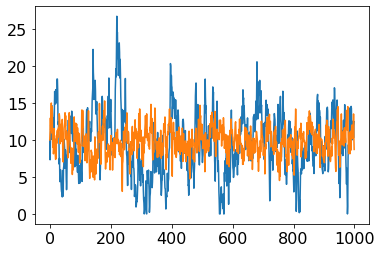

In [6]:
### can we make an example where ITSA does a better job than variance-based SA? ie nonlinear, threshold-based actions

### random power price
# P = np.random.lognormal(1.5, 1.0, size=T)
P = np.random.normal(10, 5, size=T)

P[0] = 10
persistance = 0.7
for t in range(1, T):
    P[t] = (1 - persistance) * P[t] + persistance * P[t-1] 
P[P < 0] = 0
plt.plot(I)
plt.plot(P)

# ### seasonal demand
# D = 5 + 3 * np.sin(np.arange(0, math.pi*2*10, math.pi*2*10/1000))
# plt.plot(D)

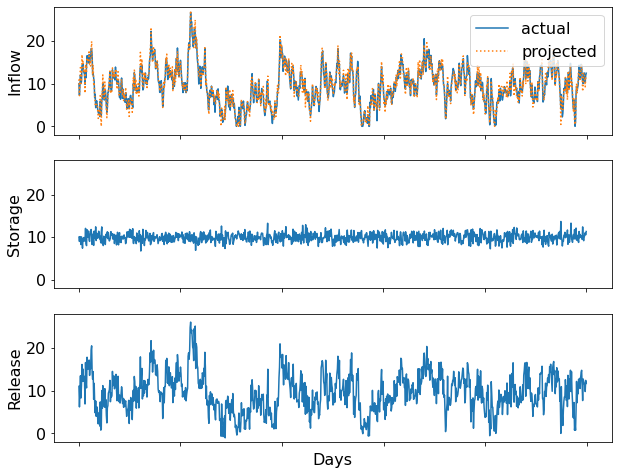

In [7]:
### run simulation
S[0] = S_init
for t in range(T):
    R[t], S[t+1] = get_R_update_S_stable(S[t], IFC[t], I[t])
    
fig, axs = plt.subplots(3, figsize=(10,8))
axs[0].plot(I, label='actual')
axs[0].plot(IFC, label='projected', ls=':')
axs[0].legend()
axs[1].plot(S)
axs[2].plot(R)
axs[0].set_ylabel('Inflow')
axs[1].set_ylabel('Storage')
axs[2].set_ylabel('Release')
for row in range(3):
    axs[row].set_ylim(-2,28)
for row in range(3):
    axs[row].set_xticklabels([])
axs[2].set_xlabel('Days')
plt.savefig('stable_series.png', bbox_inches='tight')

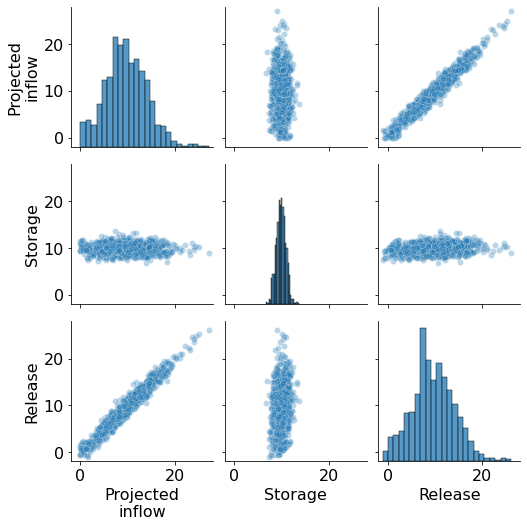

In [8]:
df_stable = pd.DataFrame({'Projected\ninflow':IFC, 'Storage':S[:-1], 'Release': R})#, 'P':P})
        
g = sns.pairplot(df_stable, plot_kws={'alpha':0.3})
for row in range(3):
    for col in range(3):
        g.axes[row,col].set_ylim(-2,28)
        g.axes[row,col].set_xlim(-2,28)
        
plt.savefig('stable_pairs_witherr.png', bbox_inches='tight')

In [9]:
# ITSA, constant number of bins
bins = 20
### entropy of individual variables
print ('Entropy(R):', single_entropy(R, bins=bins))
print ('Entropy(S):', single_entropy(S, bins=bins))
print ('Entropy(IFC):', single_entropy(IFC, bins=bins))
print()

### mutual info between two variables
print ('MI(R,S): ', mutual_information(R, S[:-1], bins=bins))
print ('MI(R,IFC): ', mutual_information(R, IFC, bins=bins))
print()

### sensitivity index
print ('eta_S: ', ITSA_index(R, S[:-1], bins=bins))
print ('eta_IFC: ', ITSA_index(R, IFC, bins=bins))
print ('eta_P: ', ITSA_index(R, P, bins=bins))
print()

### correlation
print ('rho_S: ', np.corrcoef(R, S[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R, IFC)[0,1] **2)
print ('rho_P: ', np.corrcoef(R, P)[0,1] **2)


# ITSA, constant  bin size
binsize = 1
### entropy of individual variables
print()
print()
print ('Entropy(R):', single_entropy(R, binsize=binsize))
print ('Entropy(S):', single_entropy(S, binsize=binsize))
print ('Entropy(IFC):', single_entropy(IFC, binsize=binsize))
print()

### mutual info between two variables
print ('MI(R,S): ', mutual_information(R, S[:-1], binsize=binsize))
print ('MI(R,IFC): ', mutual_information(R, IFC, binsize=binsize))
print()

### sensitivity index
print ('eta_S: ', ITSA_index(R, S[:-1], binsize=binsize))
print ('eta_IFC: ', ITSA_index(R, IFC, binsize=binsize))
print()

### correlation
print ('rho_S: ', np.corrcoef(R, S[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R, IFC)[0,1] **2)


Entropy(R): 3.742515862192286
Entropy(S): 3.585266218463983
Entropy(IFC): 3.703237261685354

MI(R,S):  0.22815198262041367
MI(R,IFC):  1.9530856665528171

eta_S:  0.06096219522414184
eta_IFC:  0.5218643657020444
eta_P:  0.05050170610556845

rho_S:  0.04172008766731825
rho_IFC:  0.9496885512486337
rho_P:  0.016261502713873843


Entropy(R): 4.160956096903242
Entropy(S): 2.126614820853167
Entropy(IFC): 4.13586780211548

MI(R,S):  0.03482301351049549
MI(R,IFC):  2.1120593670943766

eta_S:  0.008368993255279053
eta_IFC:  0.5075899187367681

rho_S:  0.04172008766731825
rho_IFC:  0.9496885512486337


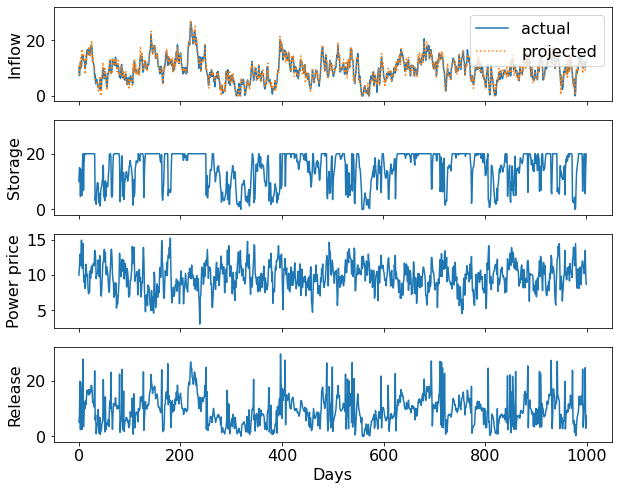

In [10]:
### reservoir release rule: fill when power price low, release when high
def get_R_update_S_power(S_t, IFC_t, I_t, P_t):
    S_min = 0
    S_max = 20
    P_thres1 = 8
    P_thres2 = 12
    if P_t > P_thres2:
        R_t = S_t + IFC_t/2
    elif P_t > P_thres1:
        R_t = (S_t)/2 #+ IFC_t) / 2
    else:
        R_t = (S_t)/4
    S_tp1 = S_t + I_t - R_t
    if S_tp1 > S_max:
        R_t += S_tp1 - S_max
        S_tp1 = S_max
    elif S_tp1 < 0:
        R_t += S_tp1
        S_tp1 = 0
    return R_t, S_tp1
        
### create arrays to hold storage & release vectors
S_init = 10
S = np.zeros(T+1)
S[0] = S_init

R = np.zeros(T)

### run simulation
S[0] = S_init
for t in range(T):
    R[t], S[t+1] = get_R_update_S_power(S[t], IFC[t], I[t], P[t])


fig, axs = plt.subplots(4, figsize=(10,8))
axs[0].plot(I, label='actual')
axs[0].plot(IFC, label='projected', ls=':')
axs[0].legend()
axs[1].plot(S)
axs[2].plot(P)
axs[3].plot(R)
axs[0].set_ylabel('Inflow')
axs[1].set_ylabel('Storage')
axs[2].set_ylabel('Power price')
axs[3].set_ylabel('Release')
for row in [0,1,3]:
    axs[row].set_ylim(-2,32)
for row in range(3):
    axs[row].set_xticklabels([])
axs[3].set_xlabel('Days')
plt.savefig('power_series.png', bbox_inches='tight')

eta_S:  0.4128356801368223
eta_IFC:  0.2928371562263727
eta_P:  0.0890222045217878

rho_S:  0.4526571452696158
rho_IFC:  0.4754716480825359
rho_P:  0.009752219702254303


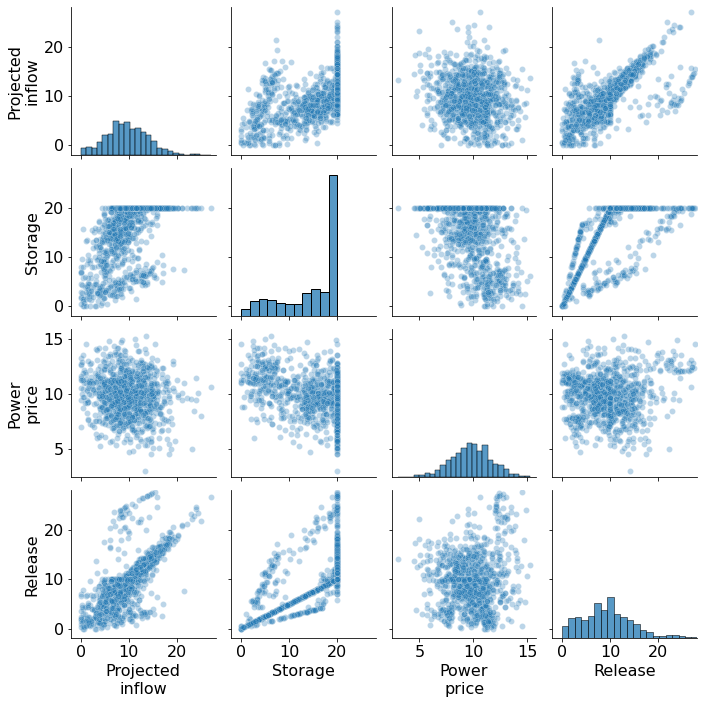

In [11]:
df_power = pd.DataFrame({'Projected\ninflow':IFC, 'Storage':S[:-1], 'Power\nprice':P, 'Release': R})#, 'P':P})
        
g = sns.pairplot(df_power, plot_kws={'alpha':0.3})
for row in [0,1,3]:
    for col in [0,1,3]:
        g.axes[row,col].set_ylim(-2,28)
        g.axes[row,col].set_xlim(-2,28)
        
plt.savefig('power_pairs_witherr.png', bbox_inches='tight')
        
### sensitivity index
print ('eta_S: ', ITSA_index(R, S[:-1], bins=bins))
print ('eta_IFC: ', ITSA_index(R, IFC, bins=bins))
print ('eta_P: ', ITSA_index(R, P, bins=bins))
print()
print ('rho_S: ', np.corrcoef(R, S[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R, IFC)[0,1] **2)
print ('rho_P: ', np.corrcoef(R, P)[0,1] **2)


Reservoir stabilization controller

eta_S:  0.13861611035402024
eta_IFC:  0.2577028313224474
eta_P:  0.06977043966890913

rho_S:  0.2873586121315472
rho_IFC:  0.6889318303004797
rho_P:  0.0007190022013481238

Power production controller

eta_S:  0.17385656047388418
eta_IFC:  0.1443696479034198
eta_P:  0.1240314737297996

rho_S:  0.3099096056406438
rho_IFC:  0.302956705699283
rho_P:  0.21190637979929366


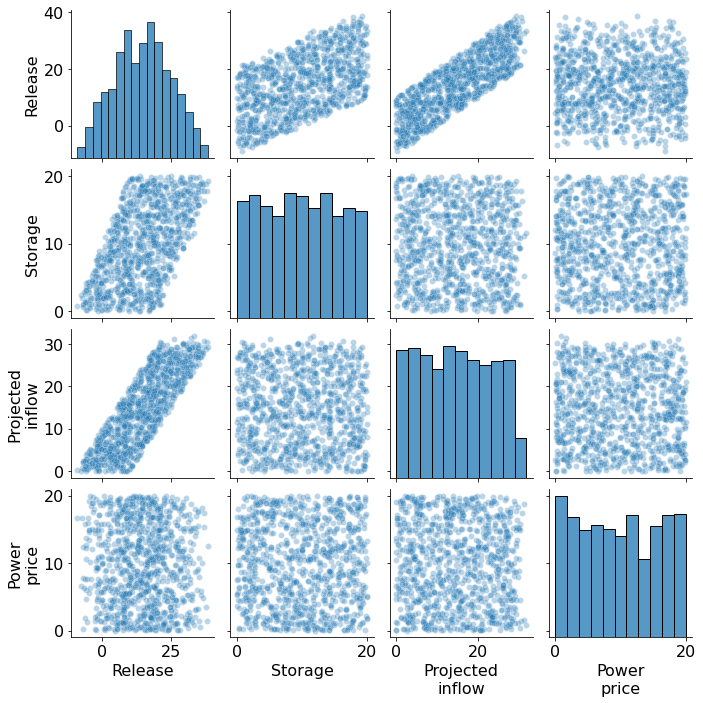

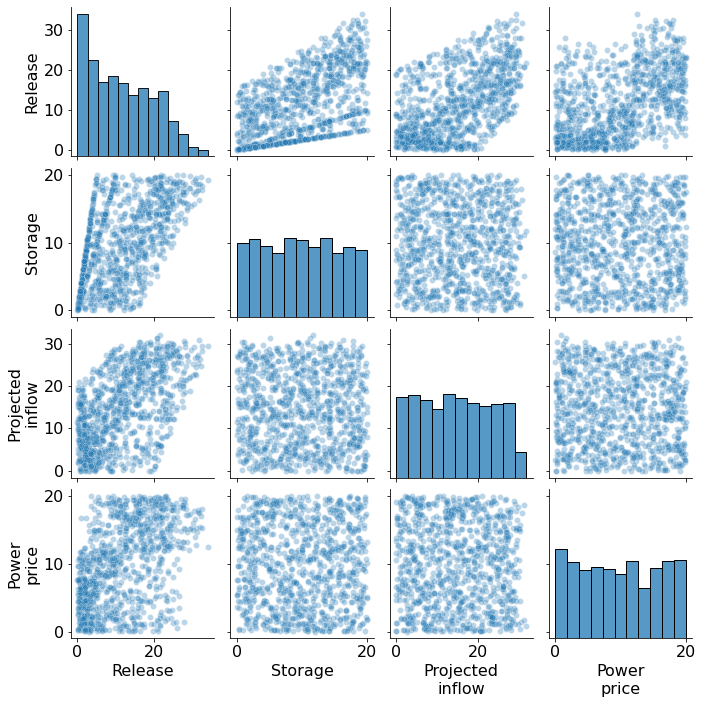

In [12]:
### random sampling approach
S_u = np.random.uniform(0, 20, size=T+1)
I_u = np.random.uniform(0, 30, size=T)
IFC_u = I_u + np.random.normal(0, forecast_err, size=T)
IFC_u[IFC_u < 0] = 0
P_u = np.random.uniform(0, 20, size=T)

### get reservoir stabilization controller output
R_stable_u = np.empty(T)
for t in range(T):
    R_stable_u[t], _ = get_R_update_S_stable(S_u[t], IFC_u[t], I_u[t])

df_stable_u = pd.DataFrame({'Release': R_stable_u, 'Storage':S_u[:-1], 'Projected\ninflow':IFC_u, 'Power\nprice':P_u})
sns.pairplot(df_stable_u, plot_kws={'alpha':0.3})
### sensitivity index
print()
print('Reservoir stabilization controller')
print()
print ('eta_S: ', ITSA_index(R_stable_u, S_u[:-1], bins=bins))
print ('eta_IFC: ', ITSA_index(R_stable_u, IFC_u, bins=bins))
print ('eta_P: ', ITSA_index(R_stable_u, P_u, bins=bins))
print()
print ('rho_S: ', np.corrcoef(R_stable_u, S_u[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R_stable_u, IFC_u)[0,1] **2)
print ('rho_P: ', np.corrcoef(R_stable_u, P_u)[0,1] **2)

### get power production controller output
R_power_u = np.empty(T)
for t in range(T):
    R_power_u[t], _ = get_R_update_S_power(S_u[t], IFC_u[t], I_u[t], P_u[t])

df_power_u = pd.DataFrame({'Release': R_power_u, 'Storage':S_u[:-1], 'Projected\ninflow':IFC_u, 'Power\nprice':P_u})
sns.pairplot(df_power_u, plot_kws={'alpha':0.3})
### sensitivity index
print()
print('Power production controller')
print()
print ('eta_S: ', ITSA_index(R_power_u, S_u[:-1], bins=bins))
print ('eta_IFC: ', ITSA_index(R_power_u, IFC_u, bins=bins))
print ('eta_P: ', ITSA_index(R_power_u, P_u, bins=bins))
print()
print ('rho_S: ', np.corrcoef(R_power_u, S_u[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R_power_u, IFC_u)[0,1] **2)
print ('rho_P: ', np.corrcoef(R_power_u, P_u)[0,1] **2)

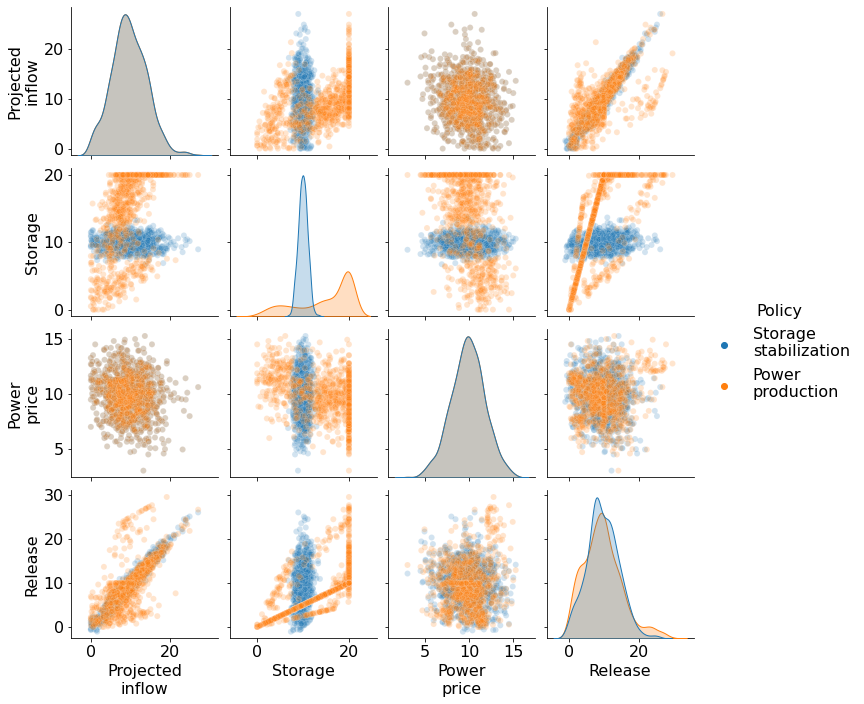

In [13]:
### plot two policies in state space
df_stable['Policy'] = 'Storage\nstabilization'
df_power['Policy'] = 'Power\nproduction'
df_stable_u['Policy'] = 'stable_u'
df_power_u['Policy'] = 'power_u'
df_stable['Sampling'] = 'Simulated'
df_power['Sampling'] = 'Simulated'
df_stable_u['Sampling'] = 'Uniform'
df_power_u['Sampling'] = 'Uniform'
df_stable['Power\nprice'] = P
df_sim = df_stable.append(df_power)
df_sim.reset_index(drop=True, inplace=True)

sns.pairplot(df_sim, vars=['Projected\ninflow','Storage','Power\nprice','Release'], hue='Policy', plot_kws={'alpha':0.2})

# df_u = df_stable_u.append(df_power_u)
# df_u.reset_index(drop=True, inplace=True)

# sns.pairplot(df_u, hue='Policy', plot_kws={'alpha':0.2})

for row in [0,1,3]:
    for col in [0,1,3]:
        g.axes[row,col].set_ylim(-2,32)
        g.axes[row,col].set_xlim(-2,32)
        
plt.savefig('powerVsStable_pairs.png', bbox_inches='tight')
  

In [14]:
      
### sensitivity index
print ('eta_S: ', ITSA_index(R, S[:-1], bins=bins))
print ('eta_IFC: ', ITSA_index(R, IFC, bins=bins))
print ('eta_P: ', ITSA_index(R, P, bins=bins))
print()
print ('rho_S: ', np.corrcoef(R, S[:-1])[0,1] **2)
print ('rho_IFC: ', np.corrcoef(R, IFC)[0,1] **2)
print ('rho_P: ', np.corrcoef(R, P)[0,1] **2)

eta_S:  0.4128356801368223
eta_IFC:  0.2928371562263727
eta_P:  0.0890222045217878

rho_S:  0.4526571452696158
rho_IFC:  0.4754716480825359
rho_P:  0.009752219702254303


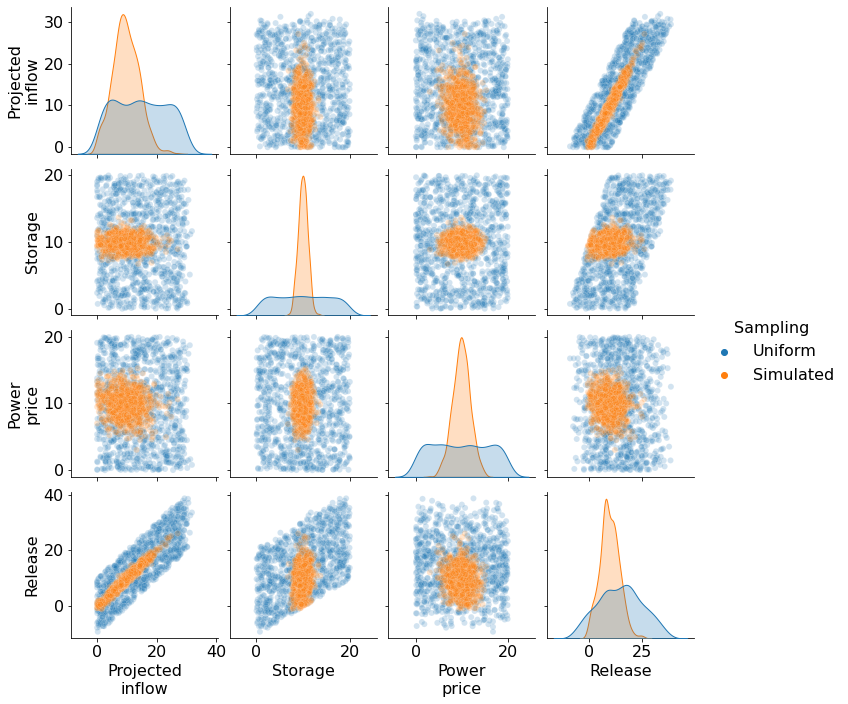

In [15]:
### plot two policies in state space
df_stable_both = df_stable_u.append(df_stable)
df_stable_both.reset_index(drop=True, inplace=True)

sns.pairplot(df_stable_both, vars=['Projected\ninflow','Storage','Power\nprice','Release'], hue='Sampling', plot_kws={'alpha':0.2})

for row in [0,1,3]:
    for col in [0,1,3]:
        g.axes[row,col].set_ylim(-2,32)
        g.axes[row,col].set_xlim(-2,32)
        
plt.savefig('stable_simVsU_pairs.png', bbox_inches='tight')

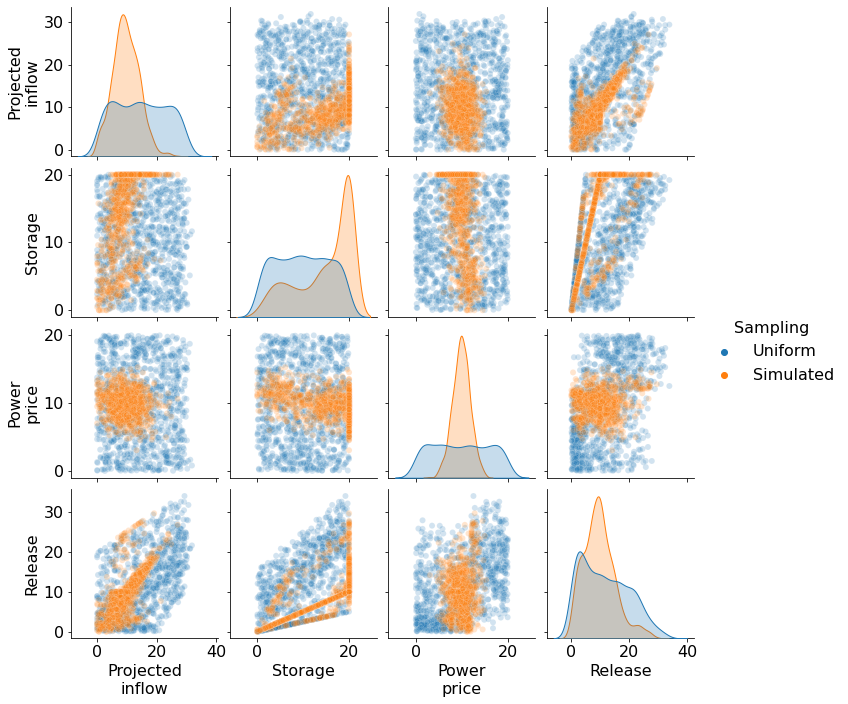

In [16]:
df_power_both = df_power_u.append(df_power)
df_power_both.reset_index(drop=True, inplace=True)

sns.pairplot(df_power_both, vars=['Projected\ninflow','Storage','Power\nprice','Release'], hue='Sampling', plot_kws={'alpha':0.2})

for row in [0,1,3]:
    for col in [0,1,3]:
        g.axes[row,col].set_ylim(-2,32)
        g.axes[row,col].set_xlim(-2,32)
        
plt.savefig('power_simVsU_pairs.png', bbox_inches='tight')